In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Create dataframes

In [51]:
people = pd.read_csv('baseball/core/People.csv')
batting = pd.read_csv('baseball/core/Batting.csv')

# add columns: batting average (hits / at bats) & hits per game (hits / games)
batting['avg'] = batting.H / batting.AB
batting['hitsPerGame'] = batting.H / batting.G
display(batting.columns)
display(people.columns)

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP', 'avg', 'hitsPerGame'],
      dtype='object')

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

## add avg hits per game to each person

In [52]:
# create temp table with the sums of all hits, games, and at bats for each distinct player id
temp = batting.groupby('playerID').agg({'H': 'sum', 'G': 'sum', 'AB': 'sum'}).reset_index()
temp['hitsPerGame'] = temp.H / temp.G

# merge temp table into people table
people = pd.merge(people, temp, on='playerID', how='inner').reset_index()

# also gonna add name length attribute
people['firstLength'] = people.nameFirst.str.len()
display(people[['playerID', 'nameFirst', 'nameLast','firstLength', 'hitsPerGame' ]])

,playerID,nameFirst,nameLast,firstLength,hitsPerGame
0,aardsda01,David,Aardsma,5.0,0.000000
1,aaronha01,Hank,Aaron,4.0,1.143420
2,aaronto01,Tommie,Aaron,6.0,0.494279
3,aasedo01,Don,Aase,3.0,0.000000
4,abadan01,Andy,Abad,4.0,0.133333
...,...,...,...,...,...
19177,zupofr01,Frank,Zupo,5.0,0.187500
19178,zuvelpa01,Paul,Zuvella,4.0,0.521531
19179,zuverge01,George,Zuverink,6.0,0.078947
19180,zwilldu01,Dutch,Zwilling,5.0,0.994536


### trim off players with less than 50 times at bat

In [75]:
deleteOutliers = people[people.AB > 50]

## make some charts

### first name length vs hits per game

<Axes: xlabel='firstLength', ylabel='hitsPerGame'>

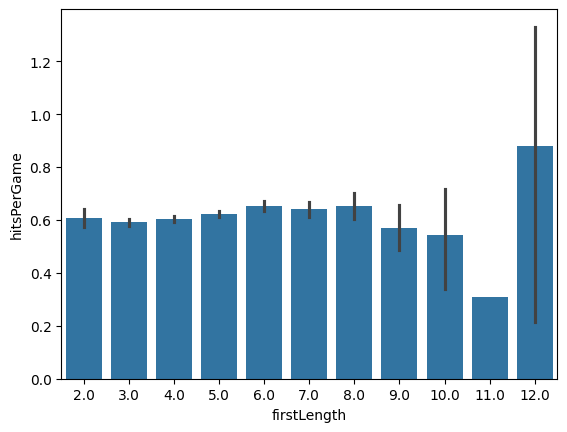

In [74]:
# remove people who have been at bat under 50 times
deleteOutliers = people[people.AB > 50]
sns.barplot(x='firstLength', y='hitsPerGame', data=deleteOutliers)


### recreate line graph with outliers removed

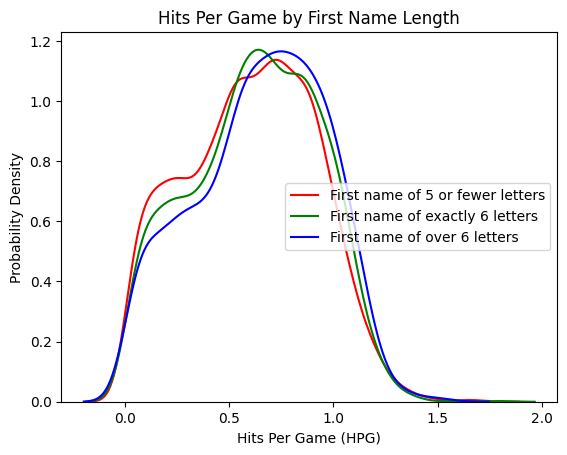

In [71]:
# divide data into categories
cat1 = deleteOutliers[deleteOutliers['firstLength'] > 5]
cat2 = deleteOutliers[deleteOutliers['firstLength'] < 5]
cat3 = deleteOutliers[deleteOutliers['firstLength'] == 5]

# label categories
sns.kdeplot(data=cat2, x='hitsPerGame', label='First name of 5 or fewer letters', color='red')
sns.kdeplot(data=cat3, x='hitsPerGame', label='First name of exactly 6 letters', color='green')
sns.kdeplot(data=cat1, x='hitsPerGame', label='First name of over 6 letters', color='blue')

# add labels
plt.xlabel('Hits Per Game (HPG)')
plt.ylabel('Probability Density')
plt.title('Hits Per Game by First Name Length')
plt.legend()

# Show the plot
plt.show()

### scatter plot

<Axes: xlabel='birthYear', ylabel='hitsPerGame'>

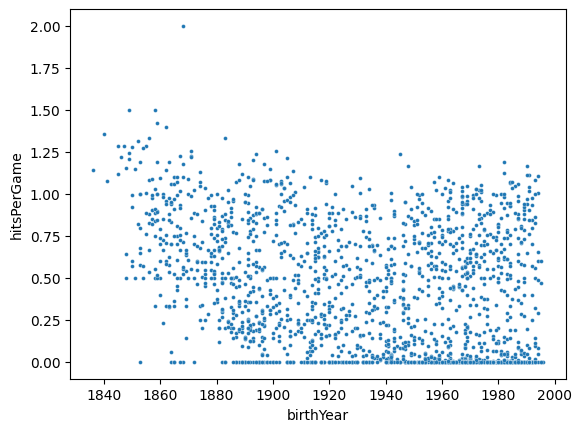

In [68]:
sns.scatterplot(data=deleteOutliers.sample(frac=0.1), x='birthYear', y='hitsPerGame', s=8)